In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_excel('/content/Housing Data 2.xlsx')

df.head()

,Name,Price,Sqft,Acres,Bedrooms,Bathrooms,Age
0,House 1,1350000,3570,1.43,4,4,47
1,House 2,1249000,4149,0.57,5,6,29
2,House 3,879900,2494,0.50,5,4,56
3,House 4,2625000,5417,1.38,5,6,23
4,House 5,1549000,5789,0.76,6,5,20


In [39]:
df =  df.drop(columns=['Name'], axis=1)

df.head()

,Price,Sqft,Acres,Bedrooms,Bathrooms,Age
0,1350000,3570,1.43,4,4,47
1,1249000,4149,0.57,5,6,29
2,879900,2494,0.50,5,4,56
3,2625000,5417,1.38,5,6,23
4,1549000,5789,0.76,6,5,20


In [40]:
df.corr()

,Price,Sqft,Acres,Bedrooms,Bathrooms,Age
Price,1.000000,0.813377,0.111596,0.655399,0.850265,-0.396719
Sqft,0.813377,1.000000,0.292152,0.711153,0.894399,-0.462724
Acres,0.111596,0.292152,1.000000,0.033679,0.196748,-0.043245
Bedrooms,0.655399,0.711153,0.033679,1.000000,0.765161,-0.351031
Bathrooms,0.850265,0.894399,0.196748,0.765161,1.000000,-0.478880
Age,-0.396719,-0.462724,-0.043245,-0.351031,-0.478880,1.000000


In [41]:
# normalization
df = (df - df.mean())/df.std()

df.head()

,Price,Sqft,Acres,Bedrooms,Bathrooms,Age
0,-0.404965,-0.474157,-0.228731,-0.812178,-0.423365,0.241396
1,-0.491713,-0.222453,-0.489823,-0.018048,0.544327,-0.366508
2,-0.808732,-0.941916,-0.511075,-0.018048,-0.423365,0.545348
3,0.690128,0.328772,-0.243911,-0.018048,0.544327,-0.569143
4,-0.234044,0.490488,-0.432140,0.776082,0.060481,-0.670460


In [42]:
# creating training variables
X = df[['Sqft', 'Bedrooms', 'Bathrooms', 'Age']]
y = df['Price']

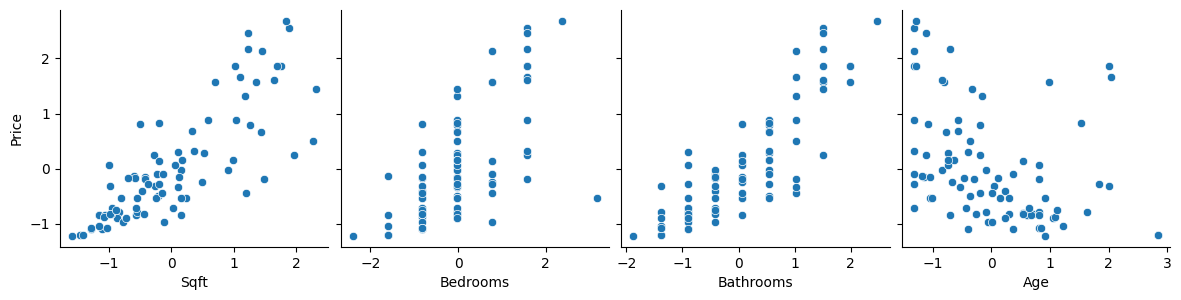

In [43]:
sns.pairplot(df, x_vars=['Sqft', 'Bedrooms', 'Bathrooms', 'Age'], y_vars='Price', height=3, aspect=1, kind='scatter')
plt.show()

In [44]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# fitting multiple linear regression to training set
regression = LinearRegression()
regression.fit(X_train, y_train)

print(regression.intercept_)
print(regression.coef_)

0.05201725477921702
[ 0.31528604 -0.07861884  0.66250368  0.02209006]


In [46]:
# predicting test and train set results
X_pred= regression.predict(X_train)
y_pred= regression.predict(X_test)

In [47]:
# difference between the actual value and the predicted value
regression_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

regression_diff

,Actual value,Predicted value
76,-0.534658,-0.005618
0,-0.404965,-0.308774
26,0.797491,0.805287
22,-0.018461,0.700343
12,-0.340548,0.754889
67,-0.963248,-0.329061
10,0.496877,1.444885
18,-0.319934,-0.310031
4,-0.234044,0.170905
68,-0.971837,-0.728433


In [48]:
# evaluate performance
mean_squared_error(y_test, y_pred)

0.22937449687350694

In [49]:
root_mean_squared_error(y_test, y_pred)

0.4789305762566292

In [50]:
r2_score(y_test, y_pred)

0.24083151274470427